In [58]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers.least_squares import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [60]:
from helpers.proj1_helpers import *
# Aya : '/Users/mac/Documents/GitHub/ml-project-1-aaa_project1/data/train.csv' 
DATA_TRAIN_PATH = '/Users/mac/Documents/GitHub/ml-project-1-aaa_project1/data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [61]:
#Pre-processing


#Remove outliers

#

#x, mean_x, std_x = standardize(tX)
#weights,loss = least_squares(y,x)
print(x[1,:])

[ 0.77526501  0.56264922  0.64215782  0.51507831 -1.90048197 -1.90048197
 -1.90048197  0.41202647  0.40880848  0.69272757  0.40604262  0.40727676
 -1.90048197  0.50093299  0.40871851  0.39706916  0.48917752  0.40517065
  0.40425254  0.50713829  0.39959511  0.78359027  0.40632175  0.51064925
  0.40568737  0.40668622 -1.90048197 -1.90048197 -1.90048197  0.51064925]


In [73]:
def remove_outliers(x):
    '''go through every column and calculate it's mean'''
    nbColumns = x.shape[1]
    for i in range(nbColumns):
        #we calculate the median of the current column after discarding the -999 values (they should not be in the median)
        median = np.median(x[:,i][x[:,i]!= -999])
        
        #we find the indices of the elements with value -999 in our current column
        indices = x[:,i] == -999
        
        #we replace the element at the found indices by the median of the current column
        x[:,i][indices] = median  
        

In [74]:
new = remove_outliers(tX)


In [75]:
print(tX[1,:])

[ 1.60937e+02  6.87680e+01  1.03235e+02  4.81460e+01  2.10700e+00
  2.25885e+02 -2.44000e-01  3.47300e+00  2.07800e+00  1.25157e+02
  8.79000e-01  1.41400e+00  4.54000e-01  4.20140e+01  2.03900e+00
 -3.01100e+00  3.69180e+01  5.01000e-01  1.03000e-01  4.47040e+01
 -1.91600e+00  1.64546e+02  1.00000e+00  4.62260e+01  7.25000e-01
  1.15800e+00  4.79020e+01 -1.00000e-02 -2.00000e-03  4.62260e+01]


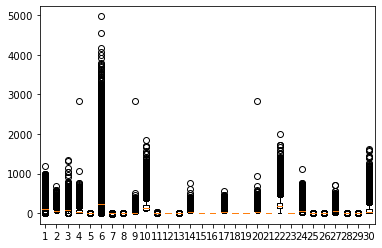

In [86]:
plt.boxplot(tX)
plt.show()

In [80]:
#polynomial feature expansion 

def build_poly(x,degree) : 
    poly = np.ones((len(x),1))
    for deg in range(1,degree+1):
        poly = np.c_[poly,np.power(x,deg)]
    return poly

In [85]:
poly = build_poly(tX,1)
print(poly.shape)

(250000, 31)


## Generate predictions and save ouput in csv format for submission:

In [64]:
DATA_TEST_PATH = '/Users/mac/Documents/GitHub/ml-project-1-aaa_project1/data/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)



In [65]:
OUTPUT_PATH = '/Users/mac/Documents/GitHub/ml-project-1-aaa_project1/data/output.csv' 
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)